In [1]:
import statistics

def read_files_and_create_lists(file_paths):
    # Create an empty list for each file
    lists = [[] for _ in range(len(file_paths))]
    results = []
    for i in range(10):
      results.append(500)

    # Iterate through each file
    for i, file_path in enumerate(file_paths):
        # Open the file
        with open(file_path, 'r') as file:
            # Read each line in the file
            for line in file:
                # Split the line into index and value
                index, value = map(int, line.strip().split(','))

                # Fill the value at the respective index in the list
                lists[i].append(value)

        # Additional processing
        episode_durations = lists[i]
        for j in range(30, len(episode_durations)):
            window = episode_durations[j-29:j]
            average_window = sum(window) / len(window)
            if average_window >= -5:
                results[i] = j
                break
    return lists, results

def calculate_mean_of_lists(lists):
    # Transpose the lists
    transposed_lists = list(zip(*lists))

    # Calculate the mean of each column
    means = [sum(column) / len(column) for column in transposed_lists]

    return means

def calculate_std_dev_of_lists(lists):
    # Transpose the lists
    transposed_lists = list(zip(*lists))

    # Calculate the standard deviation of each column
    std_devs = [statistics.stdev(column) for column in transposed_lists]

    return std_devs

# Example usage
file_paths = []
file_paths2 =  []
seeds = [246,186,169,215,410,864,163,572,417,719]

for i in range(10):
  seed = seeds[i]
  path1 = str(seed) + "_PN.txt"
  path2 = str(seed) + "_NN.txt"
  file_paths.append(path1)
  file_paths2.append(path2)

lists, results = read_files_and_create_lists(file_paths)
mean_list = calculate_mean_of_lists(lists)
std_dev_list = calculate_std_dev_of_lists(lists)

lists2, results2 = read_files_and_create_lists(file_paths2)
mean_list2 = calculate_mean_of_lists(lists2)
std_dev_list2 = calculate_std_dev_of_lists(lists2)


In [2]:
print(sum(results)/len(results))

296.7


In [3]:
print(sum(results2)/len(results2))

227.7


In [4]:
sum(results)/len(results)-sum(results2)/len(results2)

69.0

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def plot_moving_averages(list1, list2, window_size=10):
    moving_avg1 = np.convolve(list1, np.ones(window_size)/window_size, mode='valid')
    moving_avg2 = np.convolve(list2, np.ones(window_size)/window_size, mode='valid')

    # Plot the moving averages
    plt.figure(figsize=(10, 7))
    plt.plot(np.arange(window_size-1, len(list2)), moving_avg2, color='blue', label='RYB-DQN-Exp',alpha = 1)
    plt.plot(np.arange(window_size-1, len(list1)), moving_avg1, color='red', label='DQN', alpha = 1)

    # Add labels, title, legend, etc.
    plt.title('GridWorld', fontsize=20,pad=20)
    plt.xlabel('Episodes', fontsize=22 , labelpad = 10)
    plt.ylabel('Returns', fontsize=22 , labelpad = 10)
    plt.legend(fontsize=20, loc='lower right')  #
    plt.grid(True)

    plt.tick_params(axis='x', labelsize=17)  # Adjust font size for x-axis
    plt.tick_params(axis='y', labelsize=17)  # Adjust font size for y-axis

    # for spine in plt.gca().spines.values():
    #     spine.set_linewidth(2)  # Adjust border thickness

    plt.show()





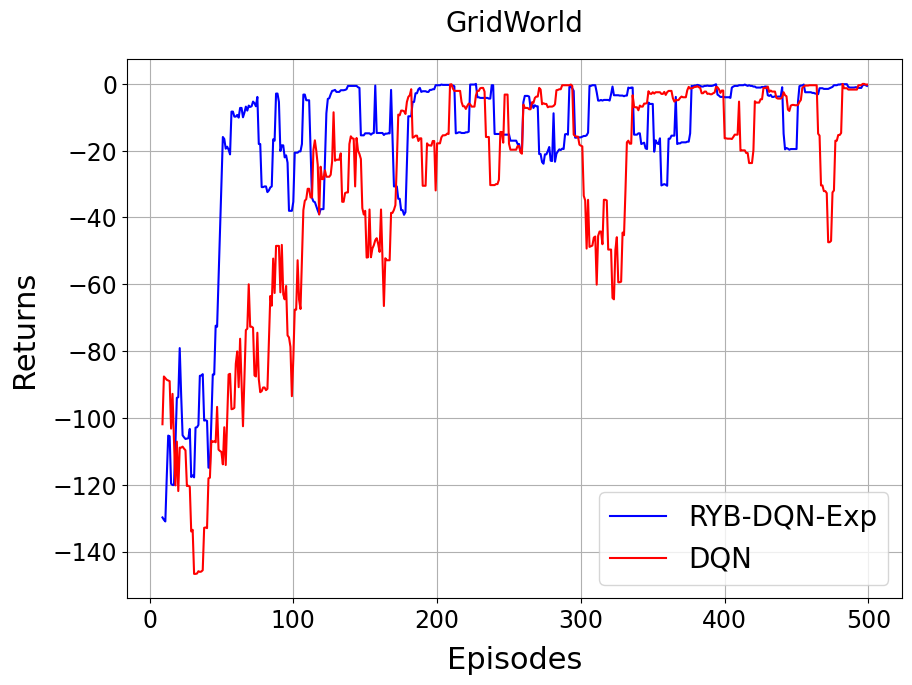

In [6]:
plot_moving_averages(lists[9], lists2[9])

In [ ]:
print("Mean List:", mean_list)
print("Standard Deviation List:", std_dev_list)
print("Results:", results)

Mean List: [-80.4, -121.5, -122.5, -89.1, -107.5, -77.8, -131.1, -107.7, -117.0, -88.7, -95.6, -91.2, -106.3, -95.5, -91.7, -115.8, -111.7, -75.6, -123.2, -78.8, -102.9, -79.2, -108.4, -117.7, -93.3, -130.7, -89.0, -77.8, -88.5, -64.6, -118.6, -88.4, -83.7, -101.8, -76.1, -132.0, -104.3, -72.6, -59.8, -77.7, -91.0, -86.2, -88.5, -63.4, -87.4, -64.7, -68.4, -63.9, -47.5, -39.6, -71.8, -50.1, -70.1, -91.8, -46.5, -60.9, -41.7, -62.9, -32.7, -72.6, -16.6, -34.8, -29.9, -50.1, -60.9, -46.4, -34.1, -46.0, -43.2, -18.4, -43.4, -44.5, -77.0, -88.3, -51.5, -44.2, -78.5, -37.7, -20.1, -32.8, -23.0, -15.1, -35.0, -23.0, -2.4, -33.1, -28.8, -57.5, -48.4, -3.9, -43.8, -20.9, -17.3, -51.9, -32.0, -30.9, -30.9, -48.6, -10.1, -59.6, -19.1, -43.3, -1.3, -29.4, -29.2, -35.3, -4.3, -59.9, -43.6, -71.8, -2.2, -33.3, -33.0, -29.3, -28.9, -31.4, -4.6, -48.3, -44.9, -14.7, -33.9, -2.2, -42.8, -35.0, -3.2, -29.4, -34.9, -17.6, -60.3, -32.3, -35.4, -31.8, -33.8, -16.6, -37.2, -16.5, -3.3, -15.7, -0.8, -45.2, 

In [ ]:
print("Mean List:", mean_list2)
print("Standard Deviation List:", std_dev_list2)
print("Results:", results2)

Mean List: [-80.4, -109.2, -111.0, -103.0, -118.3, -89.5, -123.3, -119.1, -107.4, -133.9, -131.5, -106.0, -88.9, -80.2, -122.7, -93.8, -131.3, -82.8, -91.1, -86.7, -103.9, -105.3, -110.1, -120.3, -116.9, -130.7, -102.3, -117.5, -90.1, -89.8, -118.8, -76.7, -78.5, -104.7, -73.3, -87.2, -77.3, -87.8, -71.5, -103.1, -87.3, -90.9, -63.8, -59.7, -60.7, -87.3, -101.8, -73.8, -44.4, -58.3, -71.7, -45.7, -36.4, -56.1, -87.8, -89.4, -59.7, -52.0, -17.8, -75.5, -1.7, -45.5, -36.6, -71.7, -46.1, -47.8, -2.2, -18.6, -19.1, -0.1, -6.5, -15.6, -59.5, -48.6, -60.2, -1.6, -30.5, -29.7, -45.1, -44.3, -20.7, -19.9, -46.8, -52.1, -33.0, -29.9, -44.0, -16.9, -29.5, -14.7, -8.0, -16.0, -15.9, -43.6, -18.6, -2.7, -20.8, -46.1, -47.3, -32.2, -14.9, -17.3, -18.1, -14.6, -17.5, -14.6, -20.7, -72.7, -3.2, -59.6, -2.6, -46.6, -31.0, -43.2, -18.8, -16.3, -6.8, -17.7, -43.8, -29.3, -14.4, -3.0, -32.5, -16.1, -0.7, -16.7, -58.6, -17.9, -63.2, -14.3, -20.2, -18.5, -42.9, -3.3, -30.8, -16.9, -15.9, -6.8, -15.1, -17.8

In [ ]:
print(sum(results)/len(results))

296.7


In [ ]:
print(sum(results2)/len(results2))

227.7


In [ ]:
sum(results)/len(results) - sum(results2)/len(results2)

69.0